## Imports

In [67]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import string
string.punctuation 
print (string.punctuation) 
stop_words = stopwords.words('english')
# -*- coding: utf-8 -*-
punctuation = [ c for c in string.punctuation ] + [u'\u201c',u'\u201d',u'\u2018',u'\u2019']
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jennatan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
from top2vec import Top2Vec

## Read data

In [69]:
data = pd.read_csv('Muslim.csv')

In [70]:
data_df = data.copy()

In [71]:
data_df.head()

Unnamed: 0                   Datetime             Tweet Id  \
0          0  2022-06-09 18:56:00+00:00  1534972597259194368   
1          1  2022-06-09 16:50:00+00:00  1534940888299802632   
2          2  2022-06-09 14:44:41+00:00  1534909353614000130   
3          3  2022-06-09 13:30:04+00:00  1534890576197320709   
4          4  2022-06-09 08:40:06+00:00  1534817602601734144   

                                                Text       Username  \
0  Fury at plans to turn Iconic 'Peaky Blinders' ...  Daily_Express   
1  Fury at plans to turn Iconic 'Peaky Blinders' ...  Daily_Express   
2  Fury at plans to turn Iconic 'Peaky Blinders' ...  Daily_Express   
3  The Lady Of Heaven producer blasts Muslim prot...    DailyMailUK   
4  The Lady Of Heaven producer blasts Muslim prot...    DailyMailUK   

   Like Count  
0         2.0  
1         1.0  
2         4.0  
3         9.0  
4        76.0

## Preprocessing

In [95]:
def remove_punc(text):
    txt=text
    for punc in punctuation:
        txt = txt.replace(punc, " ")
    txt = txt.lower()
    return txt 

def remove_URL_and_HTML(row):
    row = re.sub(r'https.*$', "", row)
    return row

def remove_stopwords(row):
    row = word_tokenize(row)
    return ' '.join(w for w in row if not w in stop_words)

def lemmatize(row):
    lemmatizer = WordNetLemmatizer()
    row = [lemmatizer.lemmatize(word) for word in row.split()]
    return ' '.join(row)

def preprocessing(col):
    col = col.astype(str)
    punctuation_list = col.apply(remove_punc)
    URL = punctuation_list.apply(remove_URL_and_HTML)
    lem = URL.apply(lemmatize)
    word_tokens = lem.apply(remove_stopwords) 
    return word_tokens

In [96]:
test = preprocessing(data_df_no_stopwords['Text'])
test

0           fury plan turn iconic peaky blinder pub mosque
3              lady heaven producer blast muslim protester
5        sajid javid warns cancelled screening blasphem...
7        fury plan turn historic peaky blinder style pu...
11       msmarvel rish shah pay sweet tribute lead actr...
                               ...                        
16382    one third british muslim student say 039 accep...
16383    killing name islam acceptable view one third b...
16384    obama address 200 000 berlin call 039 wall chr...
16385    disabled boy 12 held terrorism act channel tun...
16386    bbc investigates 039 anti muslim bias 039 asia...
Name: Text, Length: 12548, dtype: object

In [73]:
data_df_no_duplicates = data_df.drop_duplicates(subset='Tweet Id', keep="first")

In [74]:
data_df_no_duplicates.head()

Unnamed: 0                   Datetime             Tweet Id  \
0          0  2022-06-09 18:56:00+00:00  1534972597259194368   
1          1  2022-06-09 16:50:00+00:00  1534940888299802632   
2          2  2022-06-09 14:44:41+00:00  1534909353614000130   
3          3  2022-06-09 13:30:04+00:00  1534890576197320709   
4          4  2022-06-09 08:40:06+00:00  1534817602601734144   

                                                Text       Username  \
0  Fury at plans to turn Iconic 'Peaky Blinders' ...  Daily_Express   
1  Fury at plans to turn Iconic 'Peaky Blinders' ...  Daily_Express   
2  Fury at plans to turn Iconic 'Peaky Blinders' ...  Daily_Express   
3  The Lady Of Heaven producer blasts Muslim prot...    DailyMailUK   
4  The Lady Of Heaven producer blasts Muslim prot...    DailyMailUK   

   Like Count  
0         2.0  
1         1.0  
2         4.0  
3         9.0  
4        76.0

In [75]:
list_of_xtra_stop_words = ['http']

In [76]:
stop_words.extend(list_of_xtra_stop_words)

In [77]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [100]:
data_df_no_stopwords = data_df_no_duplicates.copy()

In [101]:
data_df_no_stopwords['preprocessed'] = preprocessing(data_df_no_stopwords['Text'])

In [102]:
data_df_no_stopwords.head()

Unnamed: 0                   Datetime             Tweet Id  \
0          0  2022-06-09 18:56:00+00:00  1534972597259194368   
1          1  2022-06-09 16:50:00+00:00  1534940888299802632   
2          2  2022-06-09 14:44:41+00:00  1534909353614000130   
3          3  2022-06-09 13:30:04+00:00  1534890576197320709   
4          4  2022-06-09 08:40:06+00:00  1534817602601734144   

                                                Text       Username  \
0  Fury at plans to turn Iconic 'Peaky Blinders' ...  Daily_Express   
1  Fury at plans to turn Iconic 'Peaky Blinders' ...  Daily_Express   
2  Fury at plans to turn Iconic 'Peaky Blinders' ...  Daily_Express   
3  The Lady Of Heaven producer blasts Muslim prot...    DailyMailUK   
4  The Lady Of Heaven producer blasts Muslim prot...    DailyMailUK   

   Like Count                                    preprocessed  
0         2.0  fury plan turn iconic peaky blinder pub mosque  
1         1.0  fury plan turn iconic peaky blinder pub mosque  
2         4.0  fury plan turn iconic peaky blinder pub mosque  
3         9.0     lady heaven producer blast muslim protester  
4        76.0     lady heaven producer blast muslim protester

In [103]:
data_df_no_stopwords = data_df_no_stopwords.drop_duplicates(subset='preprocessed', keep="first")

In [98]:
data_df_no_stopwords.shape

(12548, 7)

In [104]:
data_df_no_stopwords

Unnamed: 0                   Datetime             Tweet Id  \
0              0  2022-06-09 18:56:00+00:00  1534972597259194368   
3              3  2022-06-09 13:30:04+00:00  1534890576197320709   
5              5  2022-06-09 03:00:02+00:00  1534732022752727041   
7              7  2022-06-08 20:40:12+00:00  1534636435285884928   
11            11  2022-06-08 17:19:07+00:00  1534585826906148868   
...          ...                        ...                  ...   
16382      16379  2008-07-28 09:49:53+00:00            870405708   
16383      16380  2008-07-27 17:49:29+00:00            869872053   
16384      16381  2008-07-25 01:19:34+00:00            867639069   
16385      16382  2008-07-23 12:59:30+00:00            866074288   
16386      16383  2008-07-20 02:54:58+00:00            863150491   

                                                    Text       Username  \
0      Fury at plans to turn Iconic 'Peaky Blinders' ...  Daily_Express   
3      The Lady Of Heaven producer blasts Muslim prot...    DailyMailUK   
5      Sajid Javid warns cancelled screenings of 'bla...    DailyMailUK   
7      Fury over plans to turn historic 'Peaky Blinde...    DailyMailUK   
11     #MsMarvel Rish Shah pays sweet tribute to lead...  Daily_Express   
...                                                  ...            ...   
16382  One third of British Muslim students say it&#0...     MailOnline   
16383  Killing in the name of Islam is acceptable... ...     MailOnline   
16384  Obama addresses 200,000 in Berlin as he calls ...     MailOnline   
16385  Disabled boy, 12, held under Terrorism Act aft...     MailOnline   
16386  BBC investigates &#039;anti-Muslim bias&#039; ...     MailOnline   

       Like Count                                       preprocessed  
0             2.0     fury plan turn iconic peaky blinder pub mosque  
3             9.0        lady heaven producer blast muslim protester  
5            23.0  sajid javid warns cancelled screening blasphem...  
7             8.0  fury plan turn historic peaky blinder style pu...  
11            1.0  msmarvel rish shah pay sweet tribute lead actr...  
...           ...                                                ...  
16382         0.0  one third british muslim student say 039 accep...  
16383         0.0  killing name islam acceptable view one third b...  
16384         0.0  obama address 200 000 berlin call 039 wall chr...  
16385         0.0  disabled boy 12 held terrorism act channel tun...  
16386         0.0  bbc investigates 039 anti muslim bias 039 asia...  

[12550 rows x 7 columns]

In [105]:
list_tweets_2 = [i for i in data_df_no_stopwords['preprocessed']]

## The model

In [106]:
model_5 = Top2Vec(list_tweets_2, workers=-2, speed='deep-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-10 16:05:45,219 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/Users/jennatan/.pyenv/versions/3.8.12/envs/nlp_sentiment/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-10 16:05:46,059 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-10 16:05:53,042 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-10 16:05:54,990 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-10 16:06:09,057 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense are

In [107]:
# The number of topics Top2Vec has found
model_5.get_num_topics()

81

In [108]:
# Reduce number of topics
topic_mapping = model_5.hierarchical_topic_reduction(num_topics=5)
model_5.get_topic_hierarchy()

[[23,
  36,
  34,
  31,
  55,
  72,
  76,
  3,
  40,
  43,
  62,
  5,
  56,
  7,
  41,
  61,
  16,
  27,
  35,
  50,
  79,
  1],
 [59,
  42,
  17,
  45,
  33,
  20,
  12,
  24,
  22,
  13,
  68,
  73,
  53,
  44,
  77,
  66,
  69,
  65,
  54,
  67,
  75,
  19,
  8,
  18,
  51,
  48,
  49,
  47,
  70,
  32,
  26,
  52,
  4],
 [28, 64, 10, 29, 58, 63, 74, 0],
 [2, 78, 71, 80, 6, 9, 15, 25, 21],
 [30, 60, 11, 46, 38, 37, 39, 57, 14]]

### By topics

In [109]:
model_5.get_topics(reduced=True)

(array([['terrorist', 'terrorism', 'jihadi', 'terror', 'qaeda', 'bombing',
         'jihad', 'bomb', 'gunman', 'bomber', 'hostage', 'extremist',
         'islamic', 'massacre', 'islam', 'stabbed', 'attack', 'suspect',
         'militant', 'suspected', 'mosque', 'muslim', 'threat', 'corbyn',
         'arrest', 'killing', 'murder', 'hijab', 'iraq', 'arrested',
         'blast', 'racist', 'refugee', 'suicide', 'police', 'strike',
         'killer', 'hero', 'saudi', 'ramadan', 'isi', 'trump', 'syria',
         'eid', 'khan', 'jailed', 'radical', 'warns', 'killed', 'syrian'],
        ['jihadi', 'mosque', 'muslim', 'jihad', 'islamic', 'terrorist',
         'islam', 'terrorism', 'extremist', 'qaeda', 'bombing', 'eid',
         'gunman', 'ramadan', 'terror', 'bomb', 'hijab', 'bomber',
         'militant', 'saudi', 'corbyn', 'massacre', 'trump', 'hostage',
         'racist', 'radical', 'christian', 'jailed', 'attack', 'khan',
         'iraq', 'stabbed', 'manchester', 'syrian', 'fanatic', 'blast

In [110]:
topic_sizes,topic_nums = model_5.get_topic_sizes(reduced=True)

In [111]:
topic_sizes

array([3907, 2480, 2237, 2096, 1830])

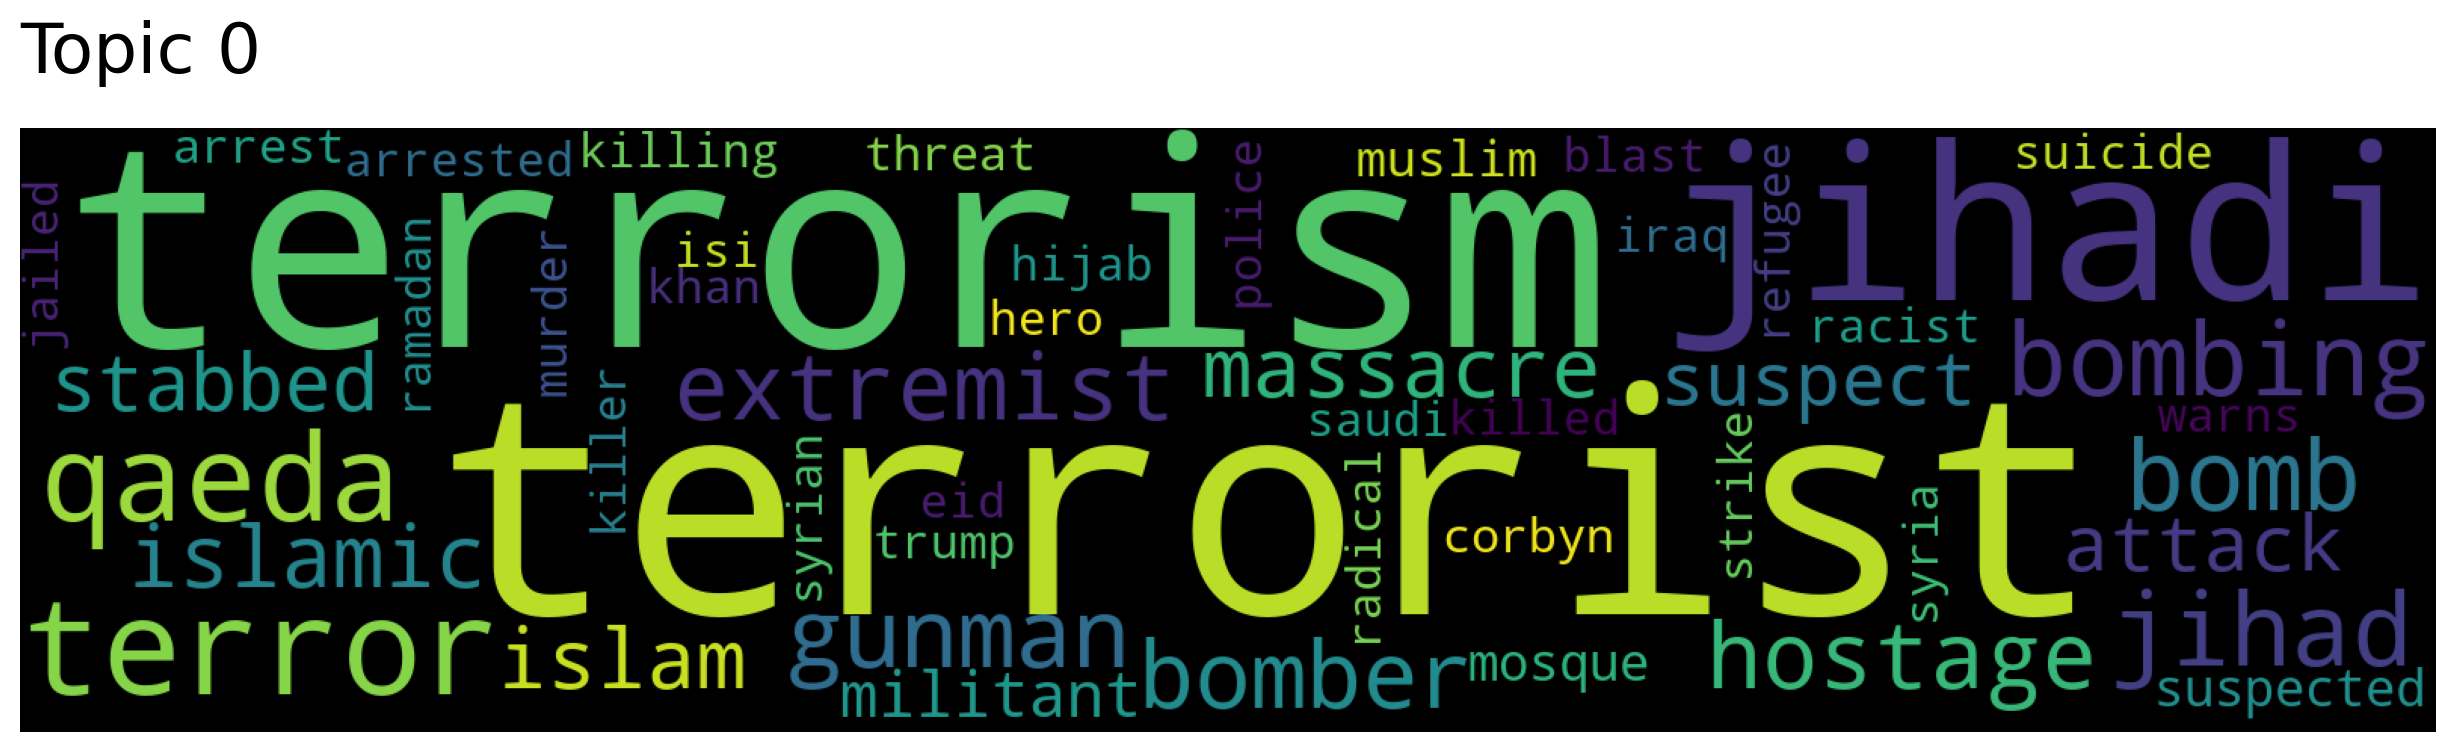

In [112]:
# Top words most semantically similar to the topic with most documents
model_5.generate_topic_wordcloud(reduced=True, topic_num=0)

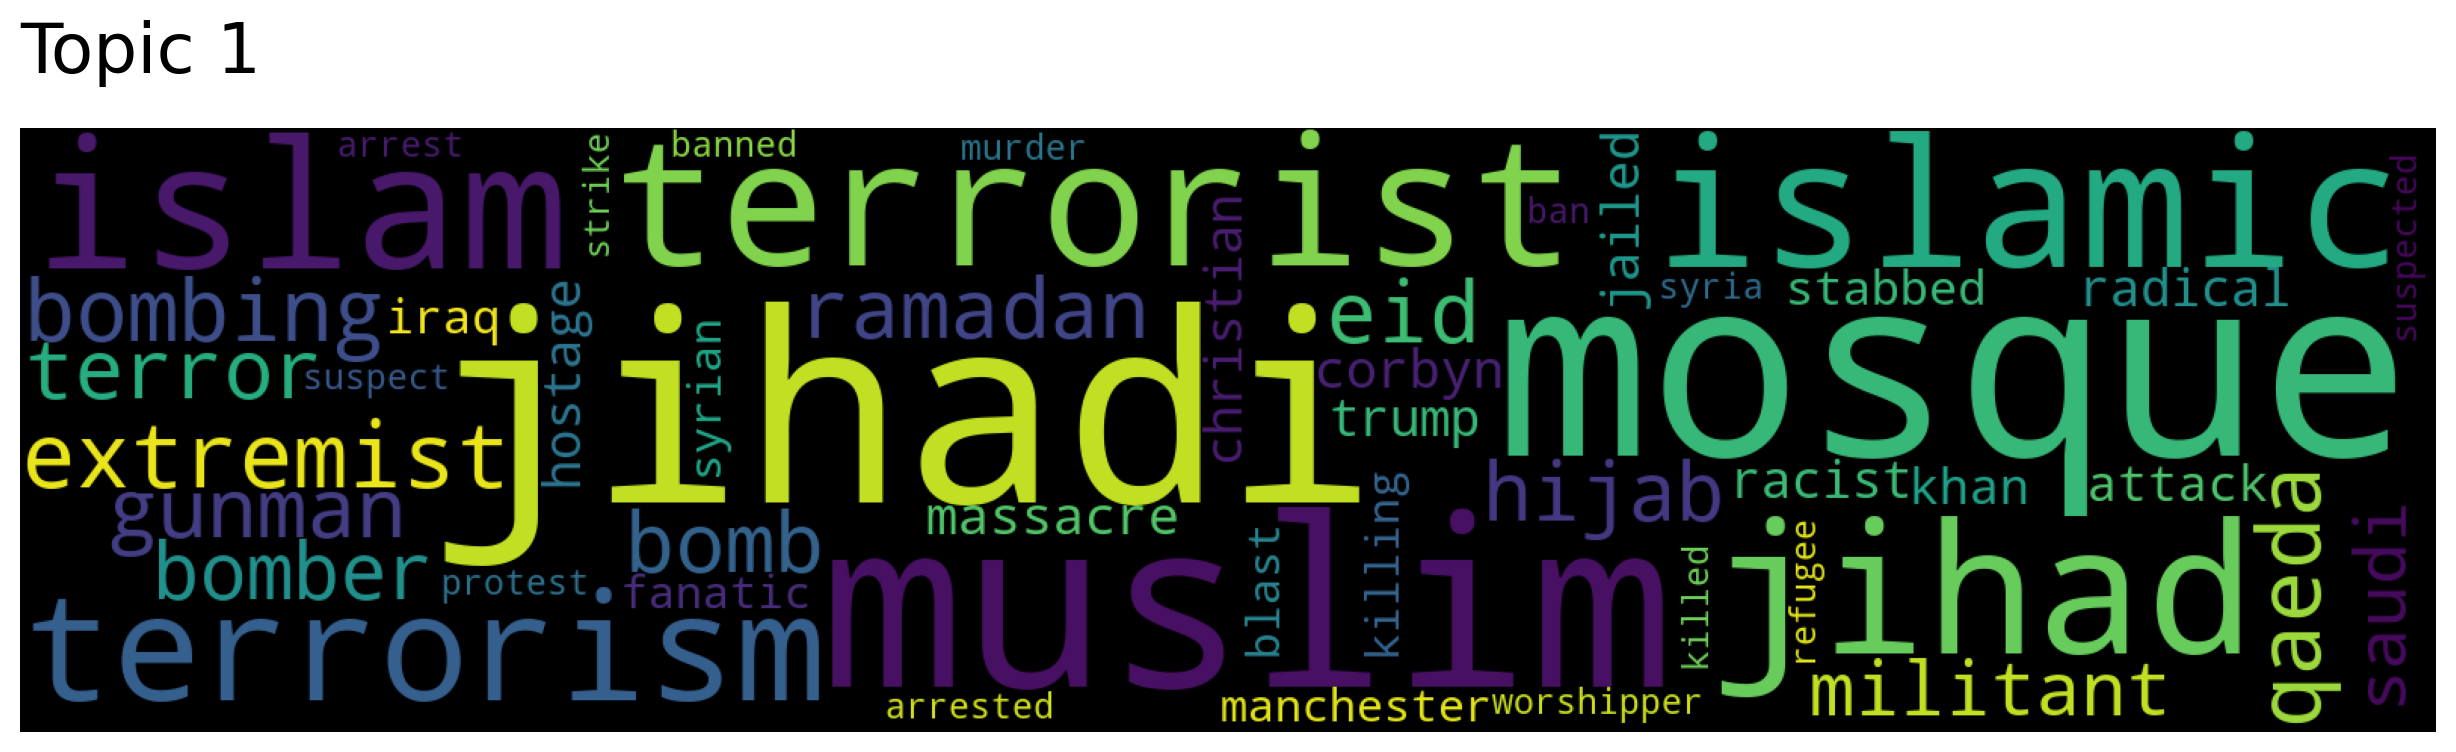

In [113]:
model_5.generate_topic_wordcloud(reduced=True, topic_num=1)

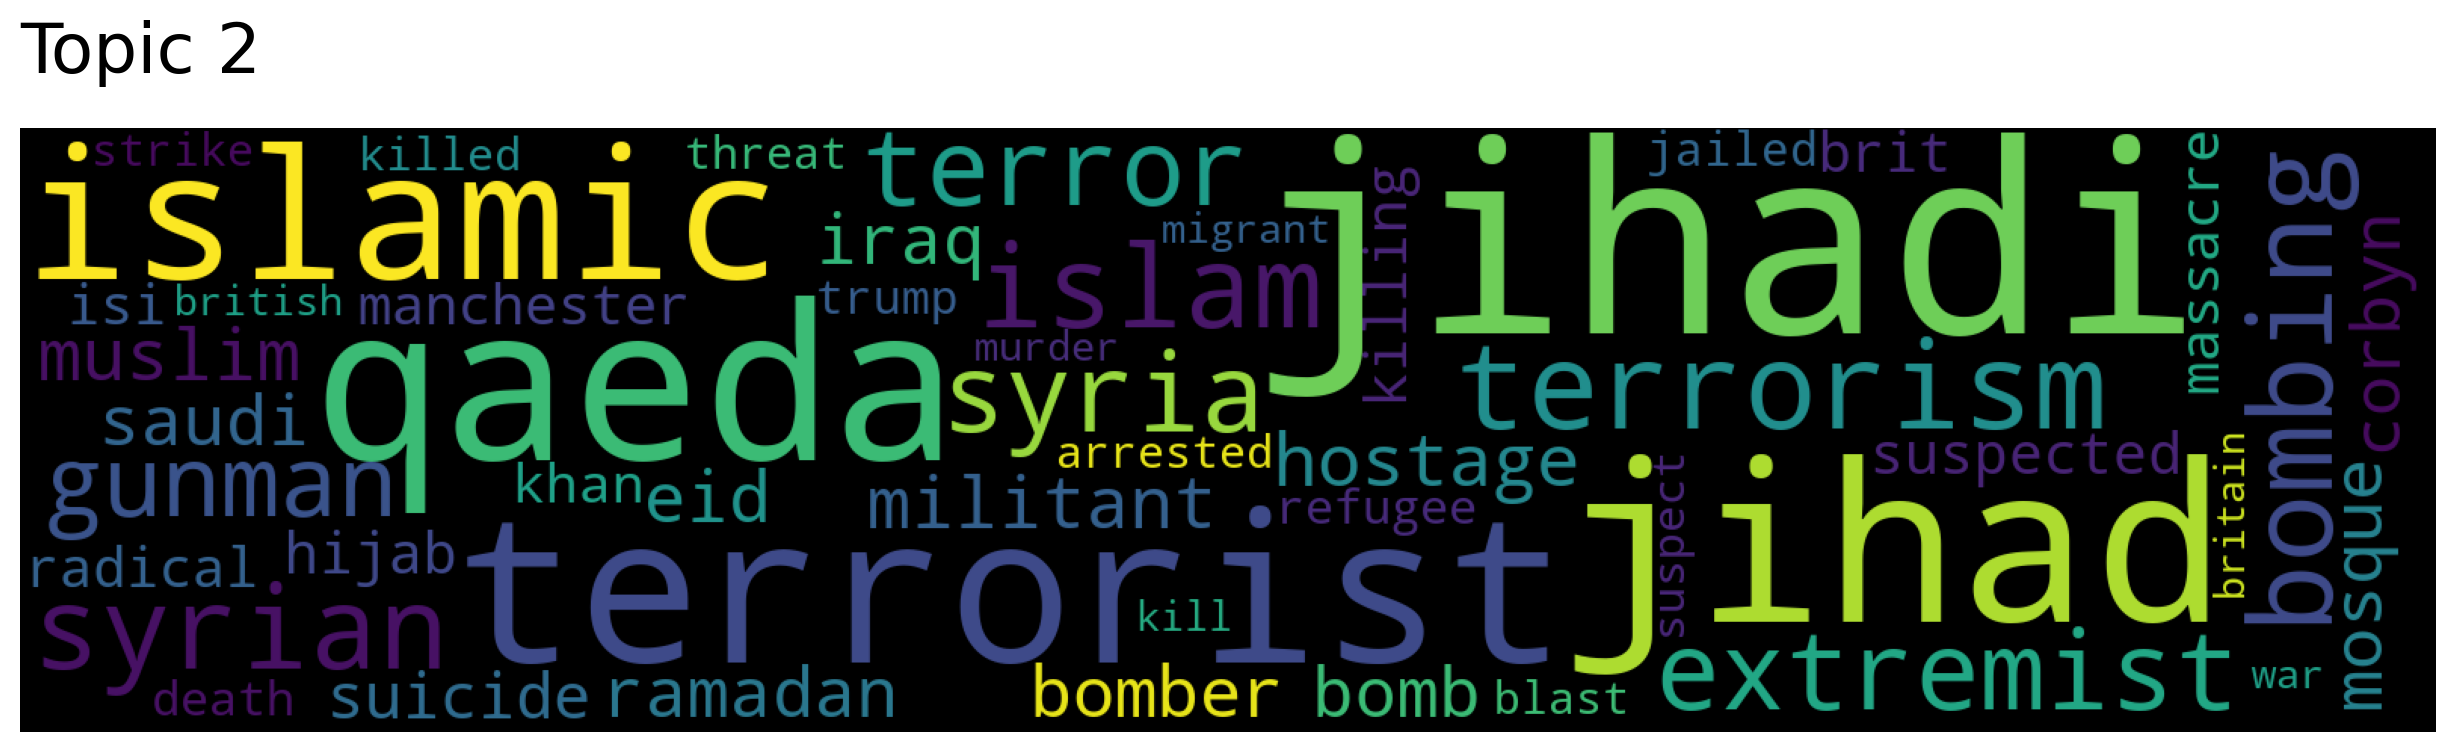

In [114]:
model_5.generate_topic_wordcloud(reduced=True, topic_num=2)

### Topics most associated with keywords

In [36]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["syria"], num_topics=5)
topic_nums

array([25, 35, 33,  1, 38])

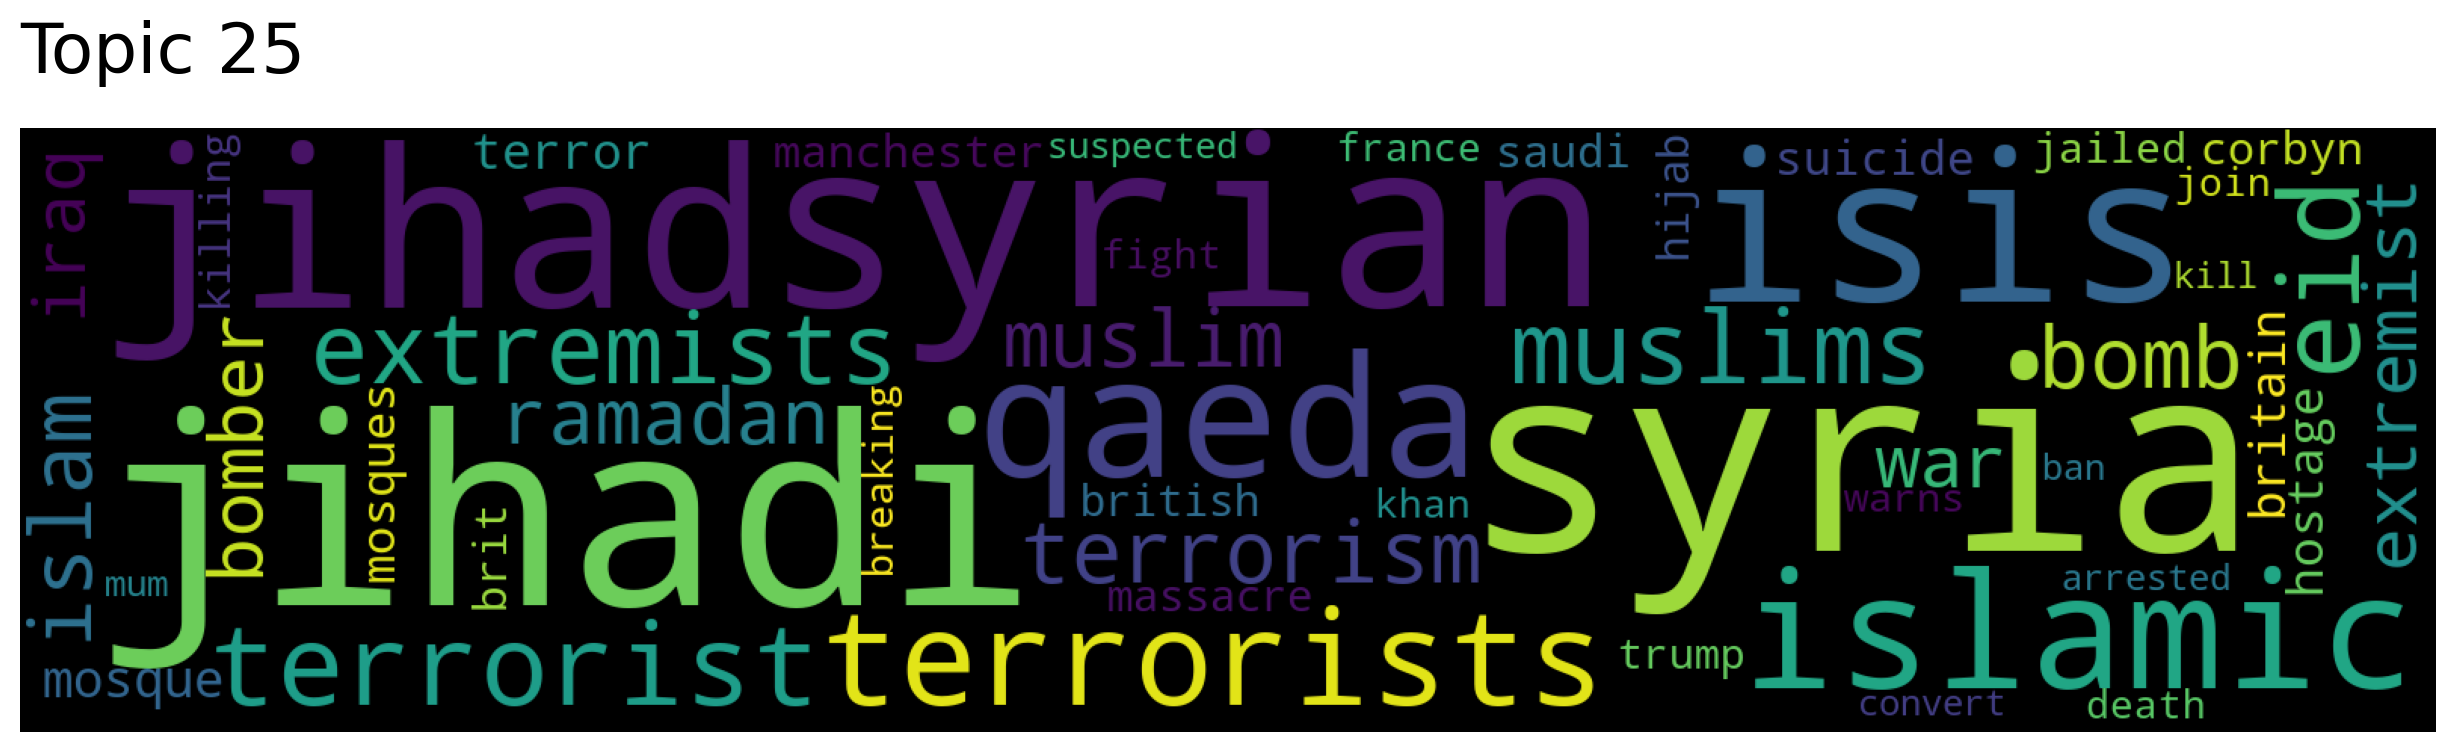

In [37]:
model_5.generate_topic_wordcloud(topic_num=25)

### Search tweets by topic number

In [148]:
documents, document_scores, document_ids = model_5.search_documents_by_topic(topic_num=2, num_docs=10)
documents

array(['45 000 failed asylum seekers given right work britain cvzmkn',
       '45 000 failed asylum seekers given right work britain ampwer',
       'officials admit lost track thousands 30k asylum seekers overstayed',
       'asylum seekers deported commit crime say wvoal2x5',
       'concern plight asylum seekers gvgtgw',
       'exclusive free rail route asylum seekers launched refugee crisis deepens',
       'three failed asylum seekers end leaving britain',
       'asylum chaos appalling truth number failed asylum seekers removed britain plummeting tinyurl com m3hsrh',
       'exclusive failed asylum seekers illegal immigrants given £66million leaving britain obu42owkgh mafeysx58s',
       'asylum seekers deported commit crime say debate wvoal2x5'],
      dtype=object)

In [19]:
documents, document_scores, document_ids = model_5.search_documents_by_topic(topic_num=0, num_docs=5)

In [20]:
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8436, Score: 0.7494311332702637
-----------
infant feared dead man drowns boat capsizes french coast trying cross channel
-----------

Document: 1273, Score: 0.7411535978317261
-----------
feared dead three others rescued boat capsized english channel
-----------

Document: 8536, Score: 0.7361211180686951
-----------
crossing english channel warn britain jump overboard attempt drown boats stopped
-----------

Document: 6307, Score: 0.727732241153717
-----------
300 libyan feared dead mediterranean boat crossing disaster boxedwkaqo 81nhyeoevp
-----------

Document: 10155, Score: 0.7267208695411682
-----------
sink boat crashing tunisian trawler mistook coast guard
-----------



In [38]:
model_5.search_documents_by_keywords(['ukraine'], num_docs= 10)

(array(['poland 450 000 crossed ukraine',
        'ukraine russia pushed back kharkiv driven towards',
        'russia positions 55 000 troops ukraine',
        'scenes poland 450 000 cross ukraine',
        'ukraine could see four million',
        '1 5 million fled ukraine putin invasion',
        'eu give temporary residence permits ukraine russia ukraine live 👉',
        'putin sends 100 000 troops ukraine',
        'eu considering sending army ukraine russia',
        'delegates ukraine russia meeting talks near ukraine belarus 📹 belta'],
       dtype=object),
 array([0.7069, 0.5847, 0.5843, 0.5746, 0.5648, 0.5558, 0.5549, 0.5547,
        0.5533, 0.5468]),
 array([  351,    49, 10137,   348,  7700,  7671,   344,   702,  7955,
          363]))

In [39]:

topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["ukraine"], num_topics=5)
topic_words

[array(['ukraine', 'ukrainian', 'putin', 'russia', 'russian', 'merkel',
        'syria', 'troops', 'boris', 'trump', 'syrian', 'hungary', 'isis',
        'brexit', 'ireland', 'turkey', 'demands', 'irish', 'war', 'crisis',
        'german', 'donald', 'deported', 'warns', 'blasts', 'afghan',
        'brussels', 'officials', 'crossing', 'eu', 'germany', 'attack',
        'calais', 'desperate', 'anti', 'admits', 'police', 'claims',
        'rescued', 'raped', 'bid', 'immigrants', 'attacks', 'european',
        'france', 'italy', 'breaking', 'greek', 'forced', 'chaos'],
       dtype='<U13'),
 array(['ukraine', 'ukrainian', 'russia', 'hungary', 'russian', 'putin',
        'merkel', 'calais', 'germany', 'brussels', 'troops', 'turkey',
        'boris', 'greece', 'ireland', 'deported', 'syria', 'europe',
        'afghan', 'german', 'mediterranean', 'isis', 'mexico',
        'immigrants', 'european', 'italy', 'france', 'eu', 'syrian',
        'trump', 'spain', 'attacks', 'irish', 'blasts', 'brex

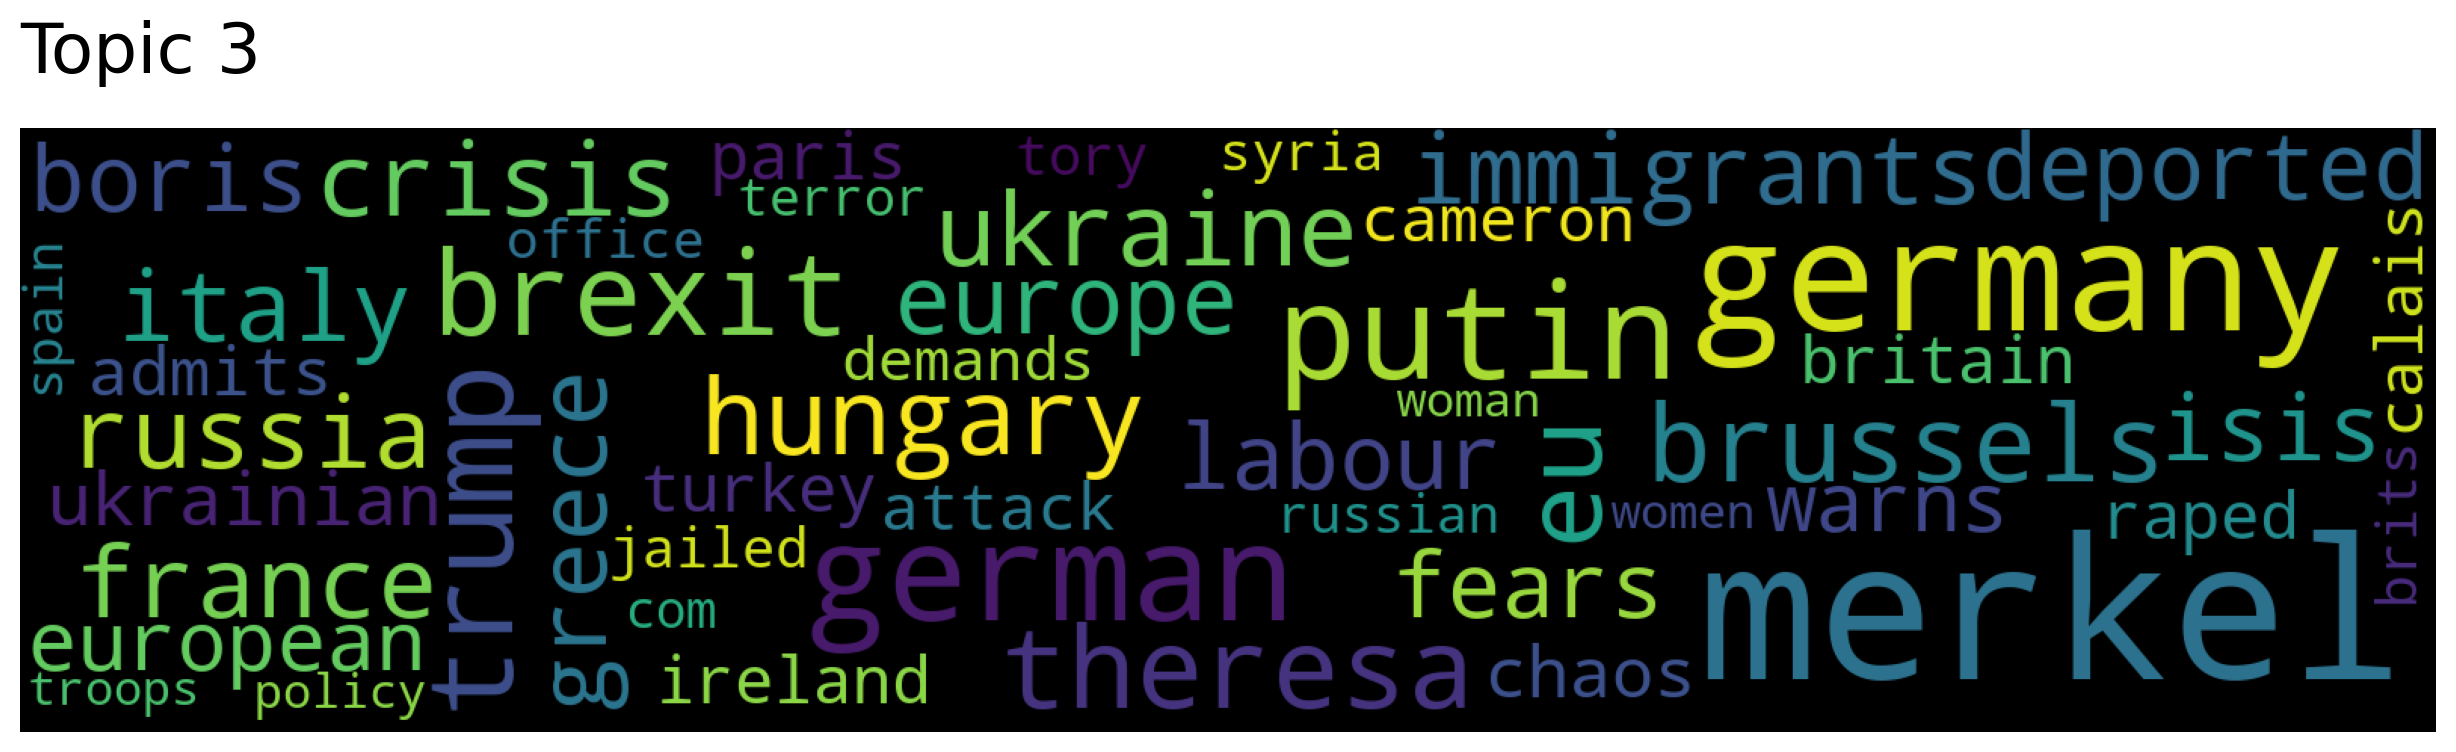

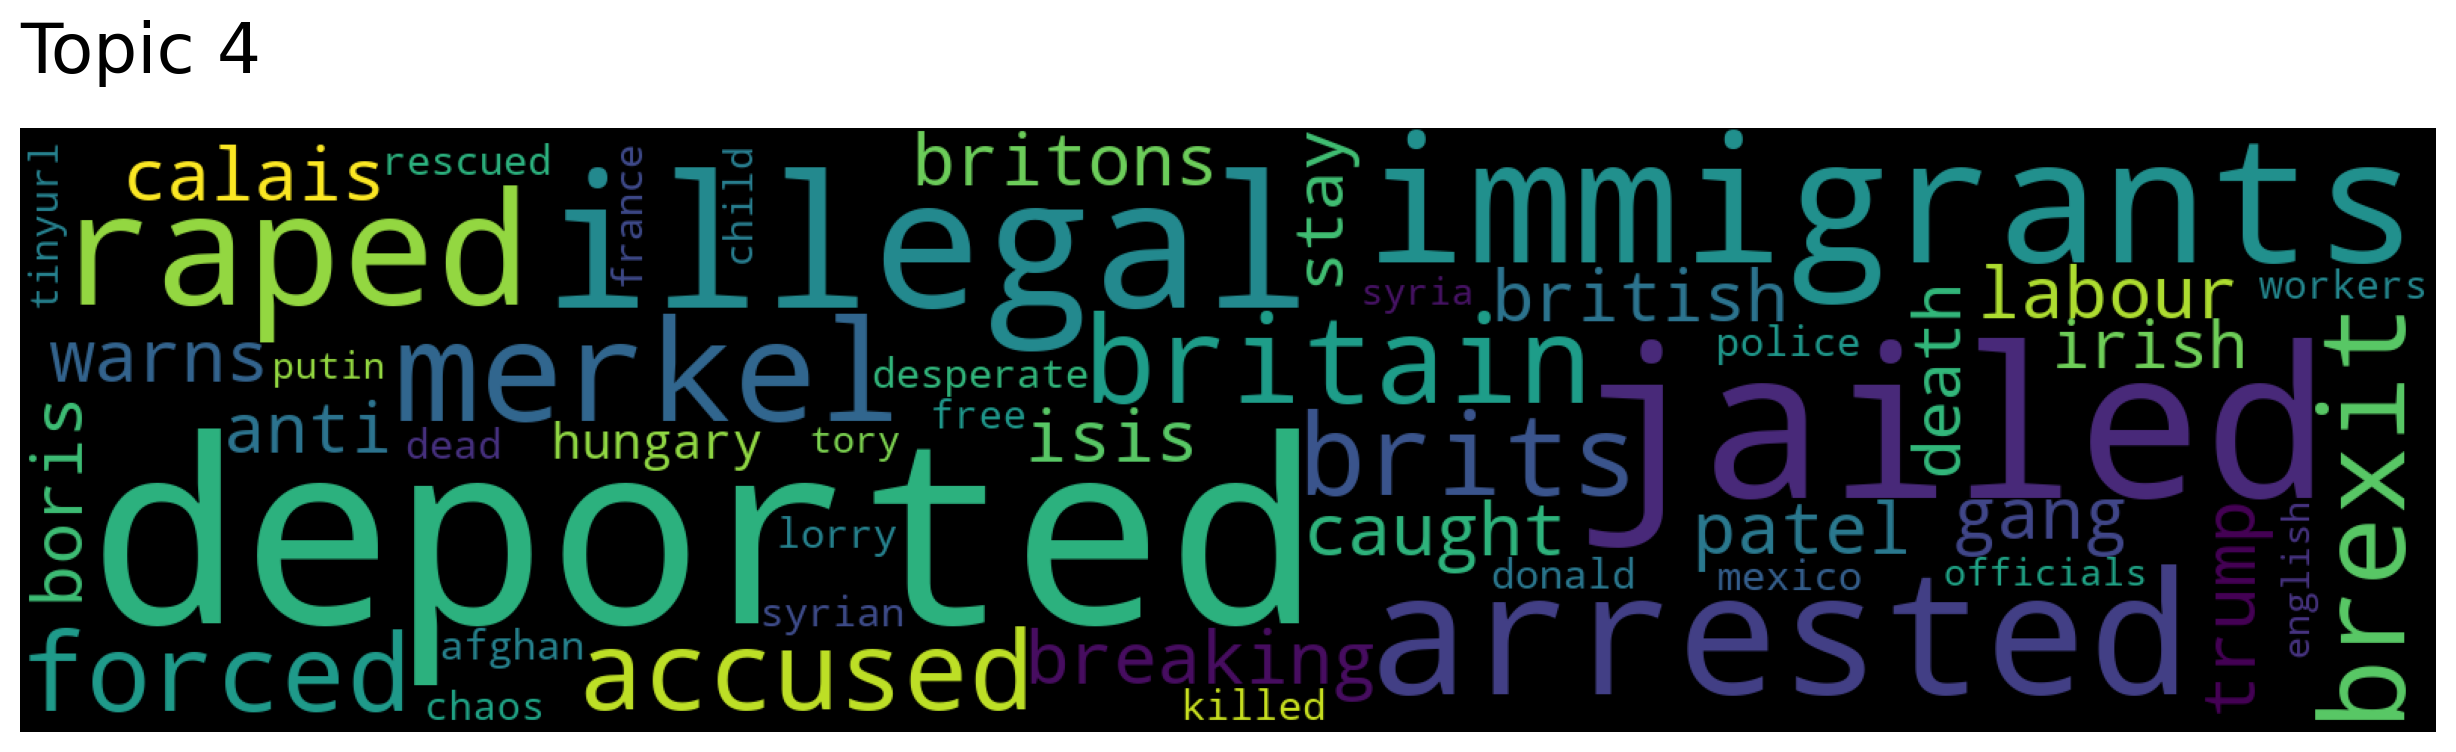

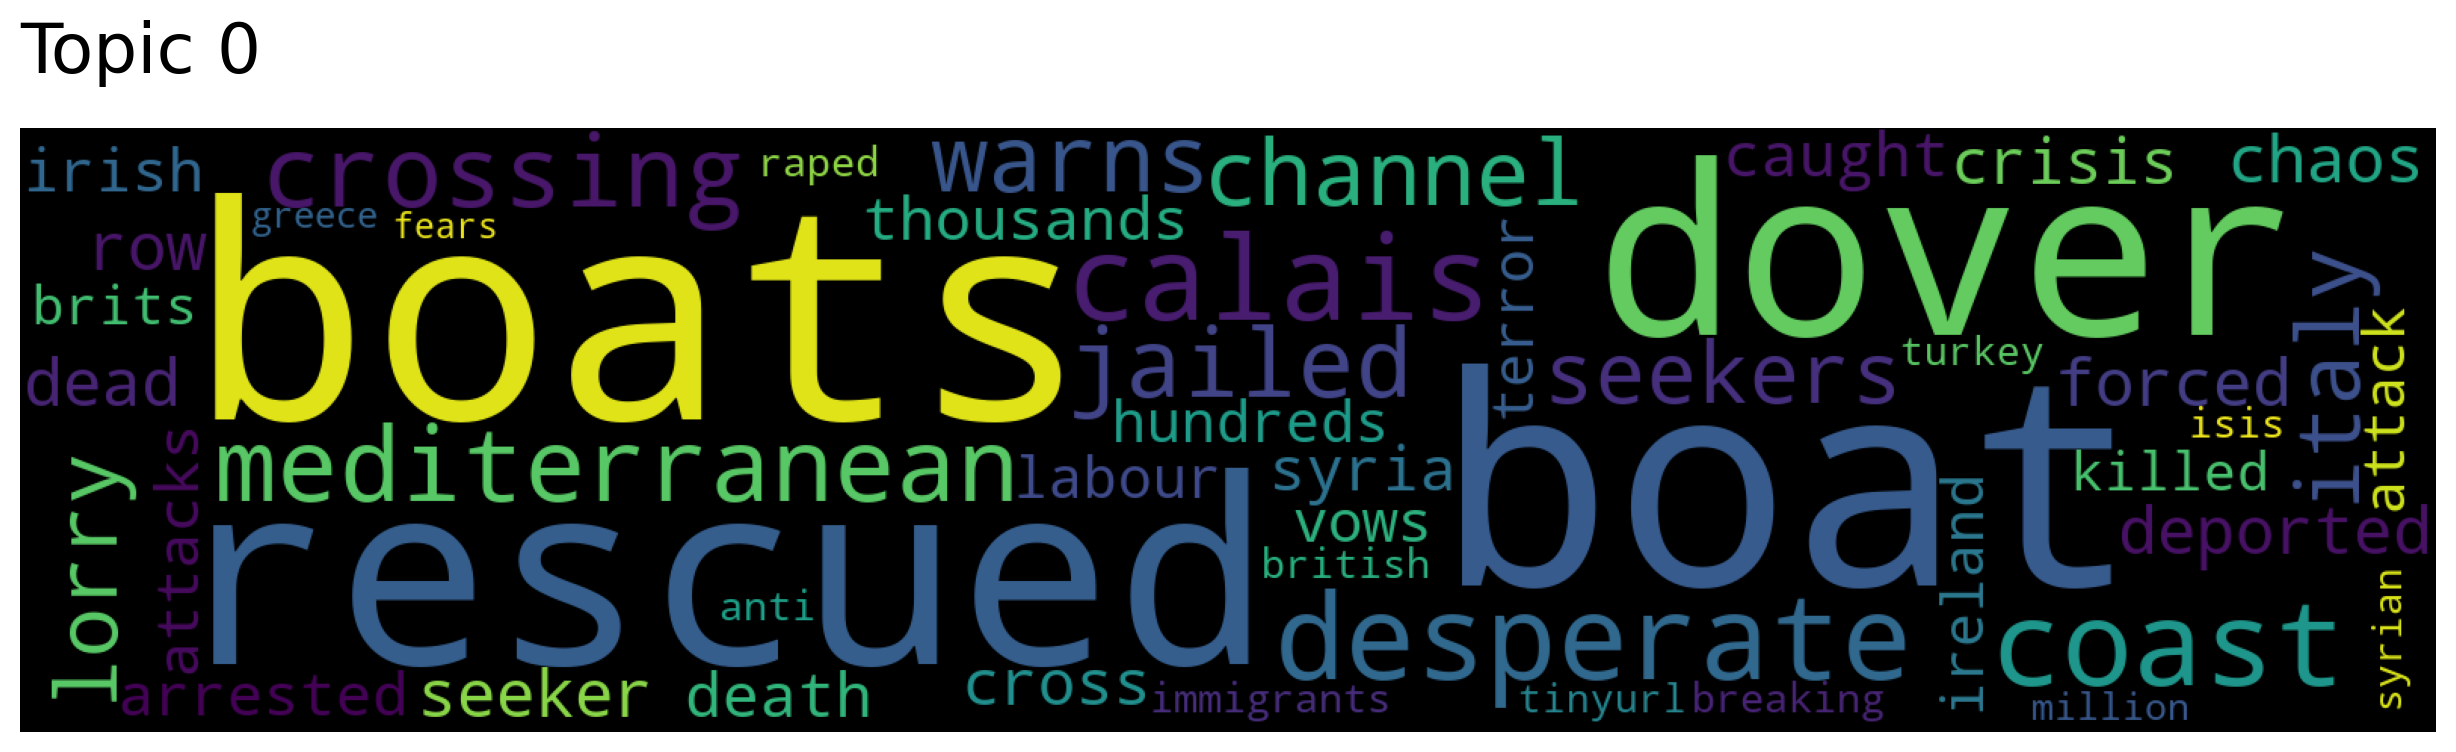

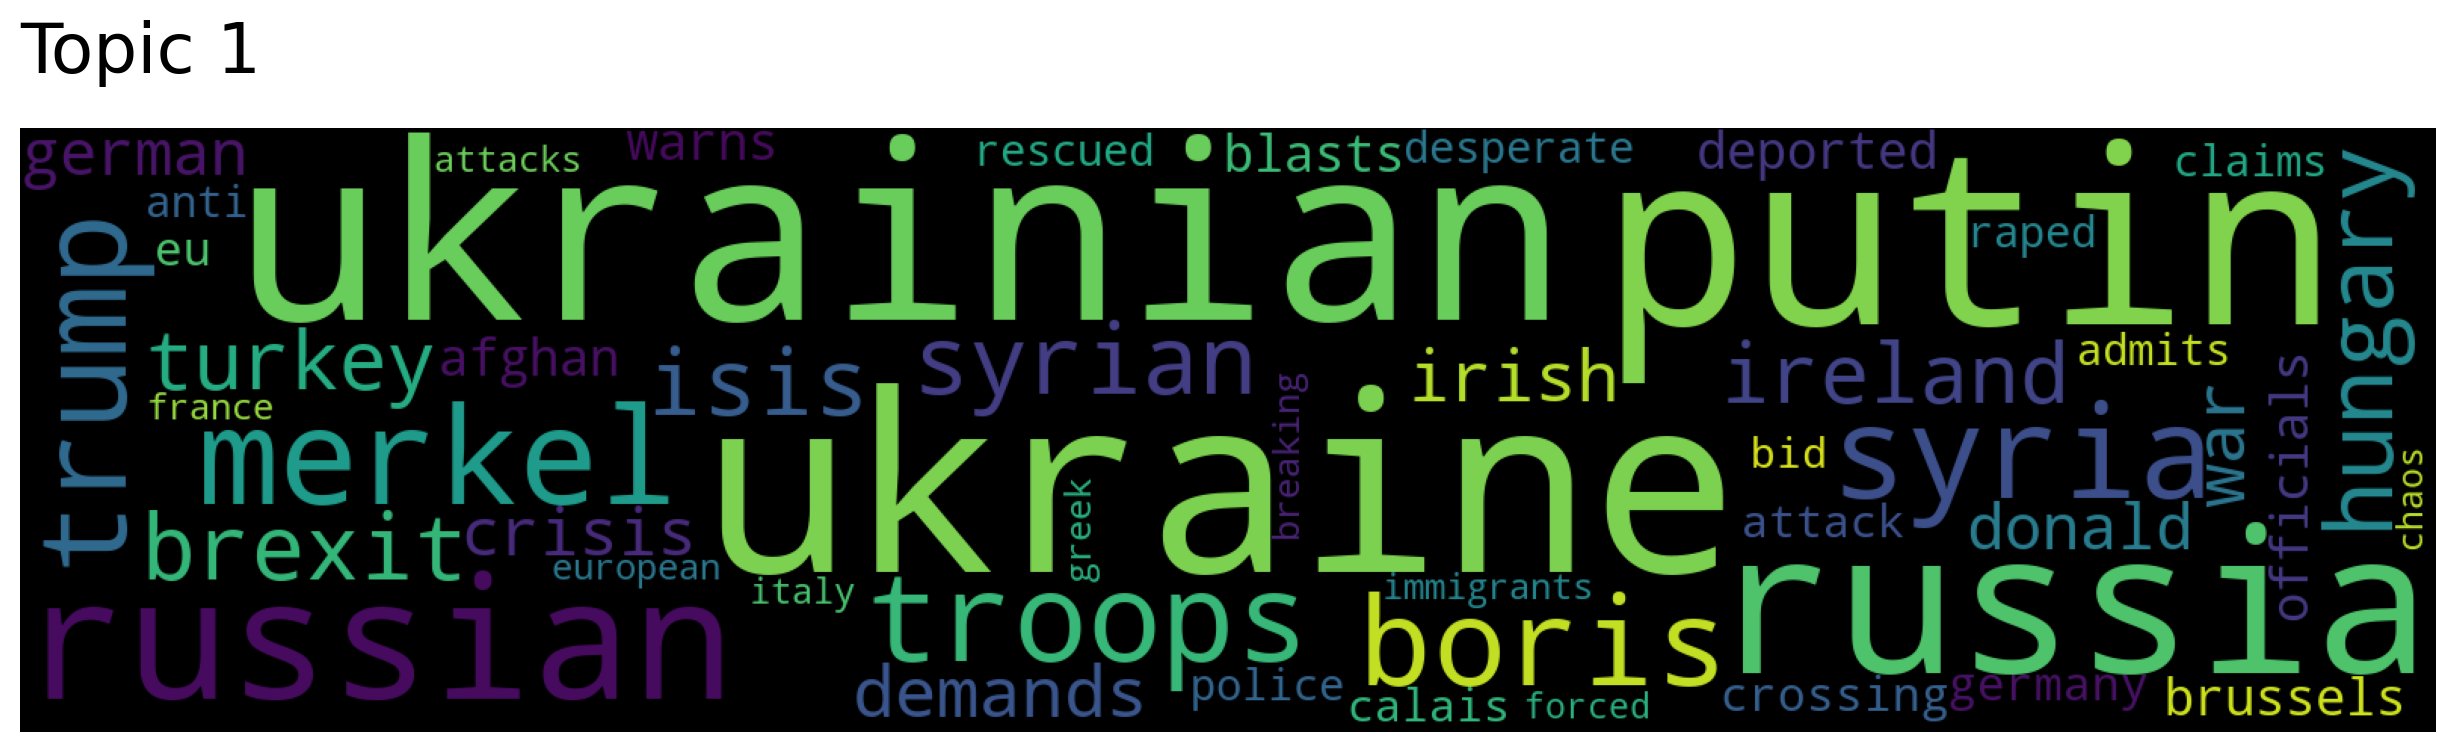

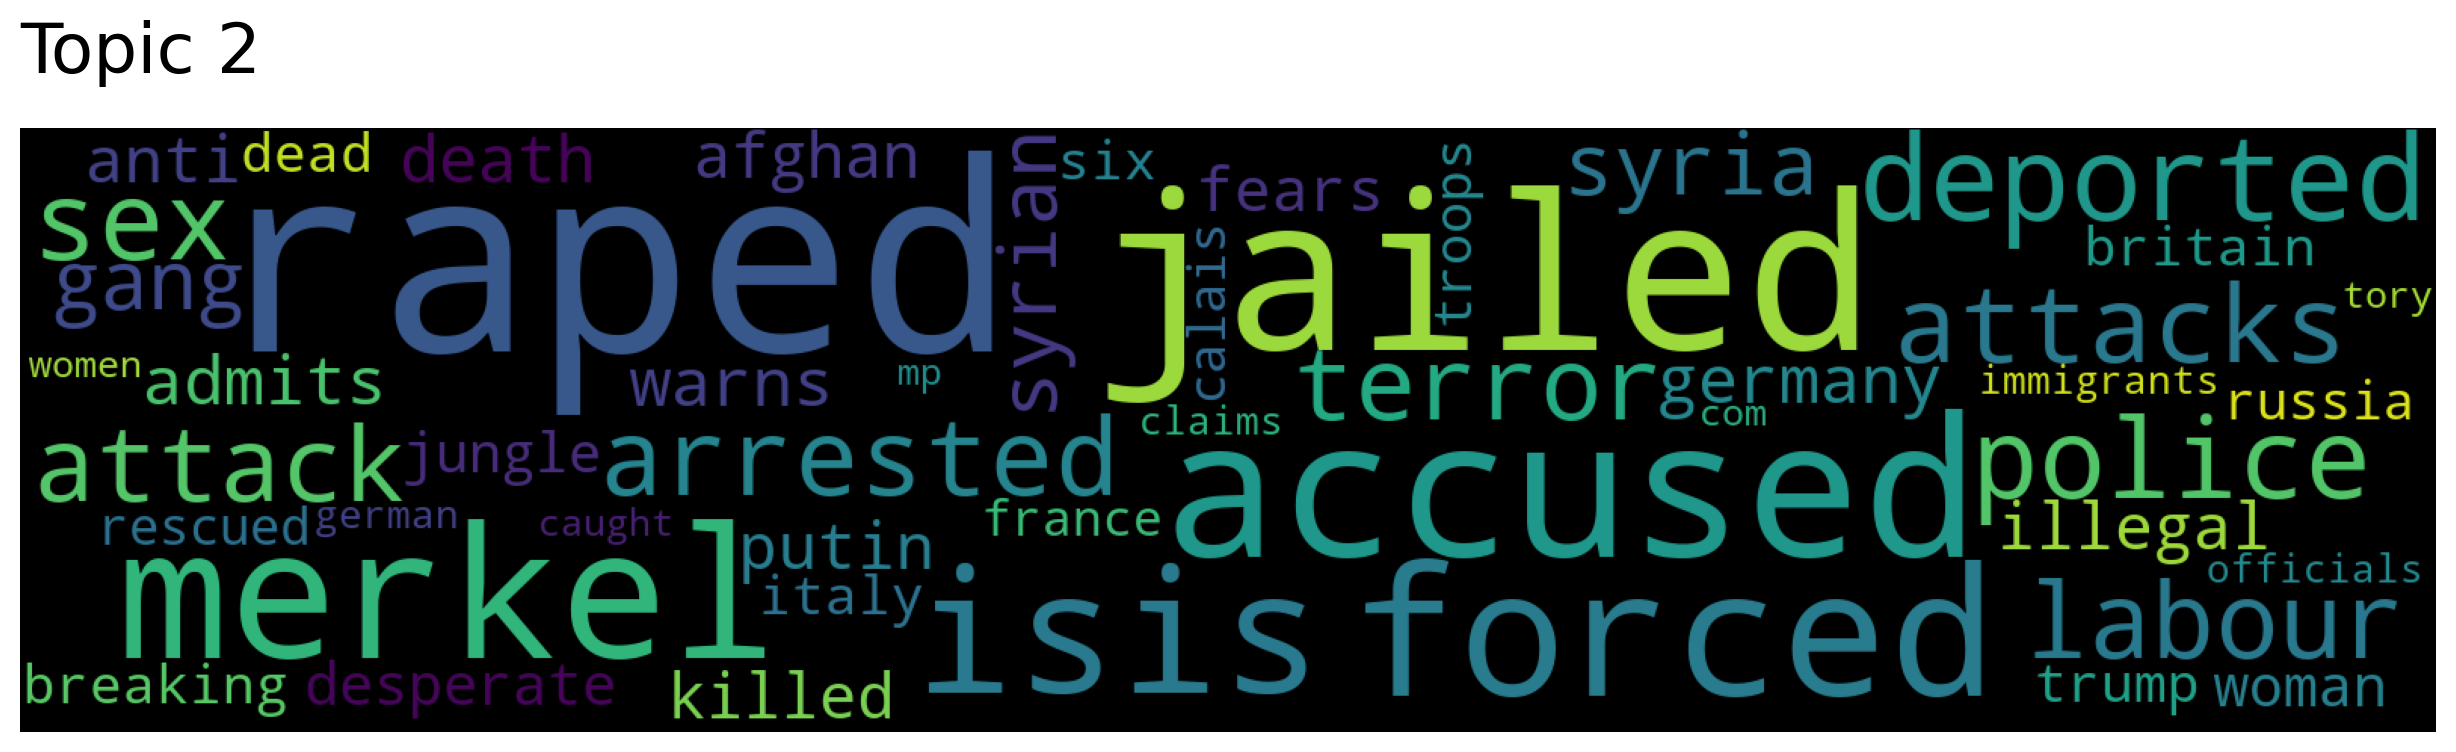

In [44]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["ukraine"], num_topics=5, reduced=True)
for topic in topic_nums:
    model_5.generate_topic_wordcloud(topic)

find number of documents associated with topics